<a href="https://colab.research.google.com/github/TopData530/ML-Sales-Prediction/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projects to use for machine learning predictions
##Eric Saechao

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,* white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y
 
* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [198]:
#Make copy of dataframe
ml_df = df.copy()

In [199]:
#Delete unnecessary columns
ml_df = ml_df.drop(columns= {'bruises','stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'ring-number', 'population'})

Dropped columns that aren't really needed because it doesnt give enough relative data to target.

In [200]:
ml_df.duplicated().sum()

6620

Lots of duplicates but has discrepencies because of dataset and unable to drop do to similarities that it counts as duplicates.


In [201]:
#Check for missing values
ml_df.isna().sum()

class                0
cap-shape            0
cap-surface          0
cap-color            0
odor                 0
gill-attachment      0
gill-spacing         0
gill-size            0
gill-color           0
veil-color           0
ring-type            0
spore-print-color    0
habitat              0
dtype: int64

##Identify and correct inconsistencies in data for categorical values

In [202]:
#Check objects of dataset
dtypes = ml_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'veil-color', 'ring-type', 'spore-print-color', 'habitat'],
      dtype='object')

In [203]:
#Check for inconsistencies in objects
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= class
e    4208
p    3916
Name: class, dtype: int64



- Column= cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



- Column= cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



- Column= cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



- Column= odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



- Column= gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



- Column= gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



- Column= gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



- Column= gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64



- Column= veil-color
w    7

No inconsistencies in dataset except all the data's row has letters instead of words so we dont know what it means. No outliers found in data

##Replace all columns rows with words instead of letters

In [253]:
#Change all columns values
ml_df['class'].replace({'p':'Poisonous', 'e':'Edible'}, inplace=True)
ml_df['cap-color'].replace({'n':'Brown', 'b':'Buff', 'c':'Cinnamon', 'g':'Gray', 
                            'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['cap-shape'].replace({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'flat',
                            'k':'Knobbed', 's':'Sunken'}, inplace=True)
ml_df['cap-surface'].replace({'f':'Fibrous', 'g':'Grooves', 'y':'Scaly', 's':'smooth'}, inplace=True)
ml_df['odor'].replace({'a':'Almond', 'l':'Anise', 'c':'Creosote', 'y':'Fishy',
                       'f':'foul', 'm':'Musty', 'n':'None', 'p':'Pungent', 's':'Spicy'}, inplace=True)
ml_df['gill-attachment'].replace({'a':'Attached', 'd':'Descending', 'f':'Free', 'n':'Notched'}, inplace=True)
ml_df['gill-spacing'].replace({'c':'Close', 'w':'Crowded', 'd':'Distance'}, inplace=True)
ml_df['gill-size'].replace({'b':'Broad', 'n':'Narrow'}, inplace=True)
ml_df['gill-color'].replace({'k':'Black', 'n':'Brown', 'b':'Buff', 'h':'Chocolate',
                             'g':'Gray', 'r':'Green', 'o':'Orange', 'p':'Pink',
                             'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['veil-color'].replace({'n':'Brown', 'o':'Orange', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['ring-type'].replace({'c':'Cobwebby', 'e':'Evanescent','f':'Flaring', 'l':'Large',
                            'n':'None', 'p':'Pendant', 's':'Sheating', 'z':'Zone'}, inplace=True)
ml_df['spore-print-color'].replace({'k':'Black', 'n':'Brown', 'h':'Chocolate', 'r':'Green','b':'Buff',
                                     'o':'Orange', 'u':'Purple', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['habitat'].replace({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths',
                          'u':'Urban', 'w':'Waste', 'd':'Woods'}, inplace=True)

Changed all rows letters to names for clearer representation of columns.

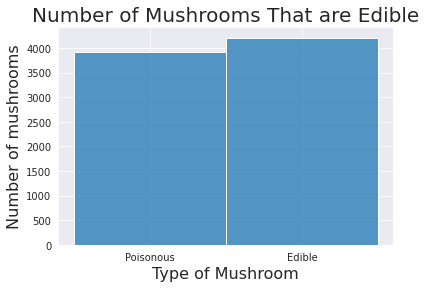

In [221]:
from matplotlib import legend
from seaborn.rcmod import set_style
# Use Histogram to produce target visualization
sns.histplot(data=ml_df, x='class');
set_style('darkgrid')
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Number of Mushrooms That are Edible', fontsize=20);

Number of edible mushrooms.

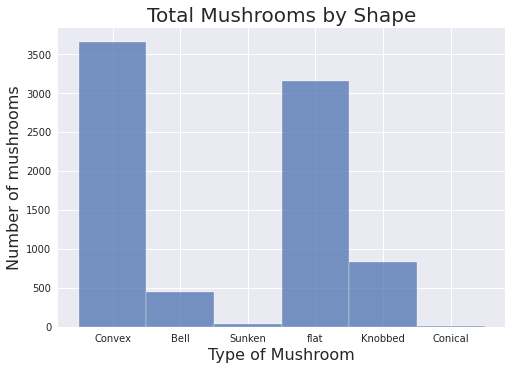

In [280]:
sns.histplot(data=ml_df, x='cap-shape');
set_style('darkgrid')
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Total Mushrooms by Shape', fontsize=20);

Most the mushrooms in dataset have flat or convex cap shapes.

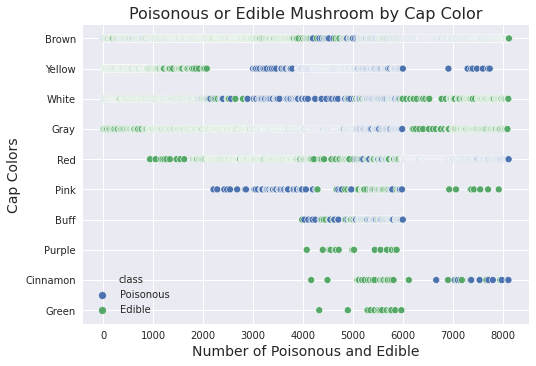

In [265]:
sns.scatterplot(x=ml_df.index, y=ml_df['cap-color'], hue=ml_df['class']);
plt.ylabel('Cap Colors', fontsize=14);
plt.xlabel('Number of Poisonous and Edible',fontsize=14);
plt.title('Poisonous or Edible Mushroom by Cap Color', fontsize=16);

Number of poisonous and edible mushrooms in relation to cap color

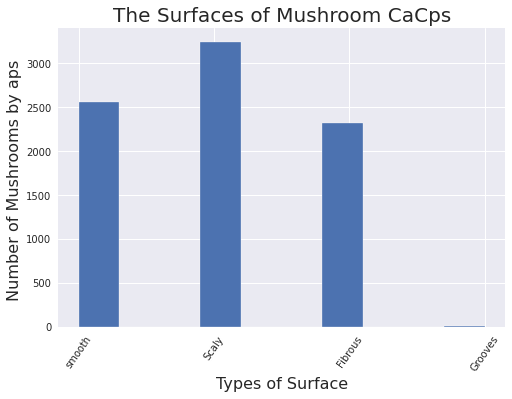

In [282]:
plt.style.use('seaborn')
ml_df['cap-surface'].hist()
set_style('darkgrid')
plt.xticks(rotation=55)
plt.xlabel('Types of Surface', fontsize=16);
plt.ylabel('Number of Mushrooms by aps ', fontsize=16);
plt.title('The Surfaces of Mushroom CaCps', fontsize=20);

Most the mushrooms caps have fairly the same amount of different surface except grooves.

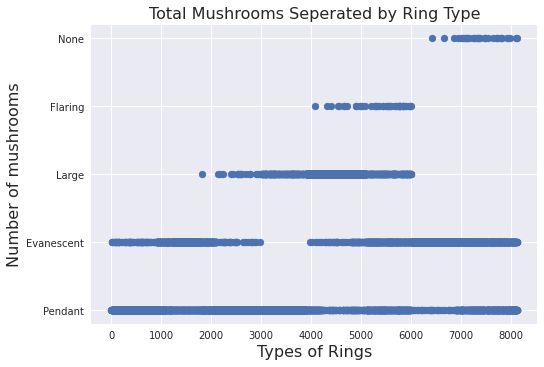

In [273]:
plt.scatter(ml_df.index, ml_df['ring-type']);
plt.xlabel('Types of Rings', fontsize=16);
plt.ylabel('Number of mushrooms',fontsize=16);
plt.title('Total Mushrooms Seperated by Ring Type',fontsize=16);

Mushrooms of ring types and pendant makes up the majority of the mushrooms.

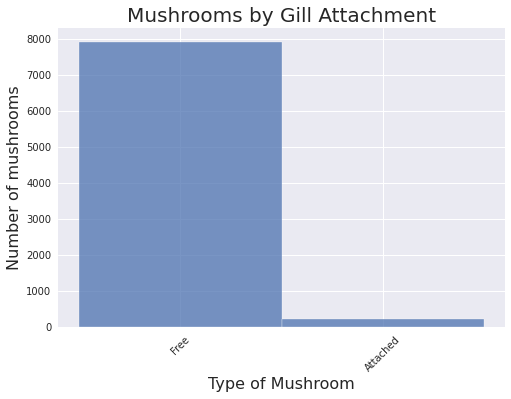

In [276]:
sns.histplot(data=ml_df, x='gill-attachment');
set_style('darkgrid')
plt.xticks(rotation= 45)
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Mushrooms by Gill Attachment', fontsize=20);

Majority of the gill attachment is free.

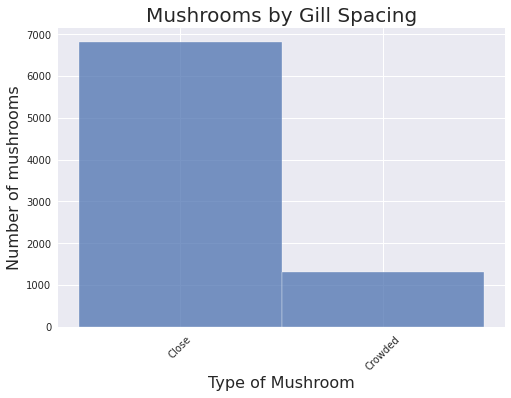

In [267]:
sns.histplot(data=ml_df, x='gill-spacing');
set_style('darkgrid')
plt.xticks(rotation= 45)
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Mushrooms by Gill Spacing', fontsize=20);


Amount of mushrooms in dataset that are closed or crowded

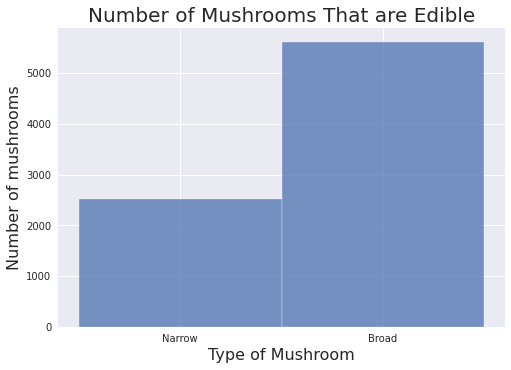

In [275]:
sns.histplot(data=ml_df, x='gill-size');
set_style('darkgrid')
plt.xlabel('Gill type', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Number of Mushrooms by Gill Size', fontsize=20);

The chart shows that broad gill size has twice the amount of narrow gill size from dataset.

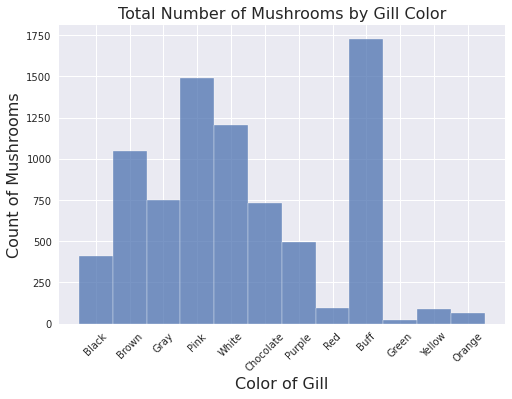

In [269]:
sns.histplot(data=ml_df, x='gill-color');
plt.xticks(rotation=45);
plt.xlabel('Color of Gill', fontsize=16);
plt.ylabel('Count of Mushrooms',fontsize=16);
plt.title('Total Number of Mushrooms by Gill Color', fontsize=16);

Gill colors and we can see that most the mushrooms are a buff color. 

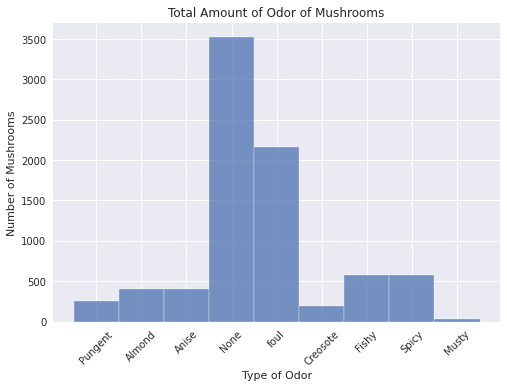

In [271]:
sns.histplot(data=ml_df, x='odor');
plt.xticks(rotation=45);
plt.xlabel('Type of Odor');
plt.ylabel('Number of Mushrooms');
plt.title('Total Amount of Odor of Mushrooms');

We can see most mushrooms in dataset have no smell or a foul smell.

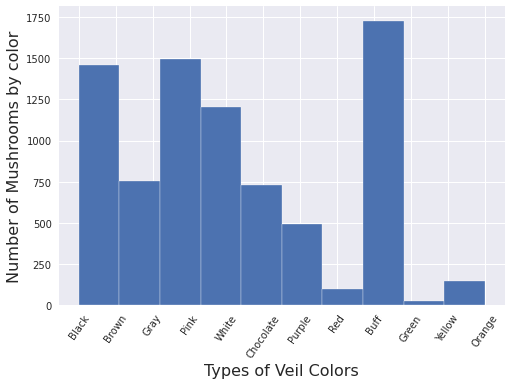

In [242]:
plt.style.use('seaborn')
ml_df['gill-color'].hist()
set_style('darkgrid')
plt.xticks(rotation=55)
plt.xlabel('Types of Veil Colors', fontsize=16);
plt.ylabel('Number of Mushrooms by color', fontsize=16);

Some colors of the veil are more than others.

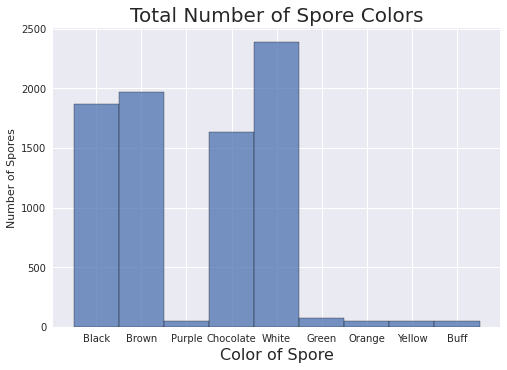

In [261]:
sns.histplot(data= ml_df, x= 'spore-print-color', edgecolor='black');
plt.xlabel('Color of Spore', fontsize=16);
plt.title('Total Number of Spore Colors',fontsize=20);
plt.ylabel('Number of Spores');

Number of mushrooms spores by colors and there are four colors that make up the majority of the dataset.

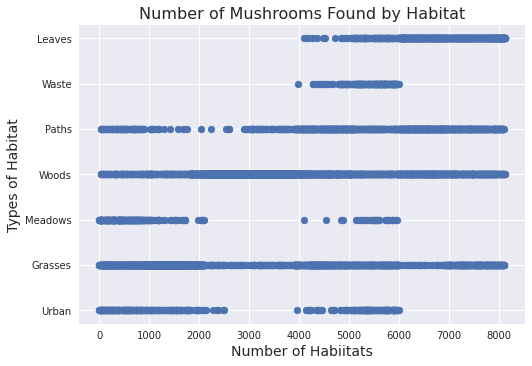

In [278]:
plt.scatter(ml_df.index, ml_df['habitat']);
plt.xlabel('Number of Habiitats', fontsize=14);
plt.ylabel('Types of Habitat', fontsize=14);
plt.title('Number of Mushrooms Found by Habitat', fontsize=16);

A scatterplot of the habitats most mushrooms were found in and four of the areas make up the majority of the dataset.